In [1]:
! jt -r

Reset css and font defaults in:
C:\Users\ugur.eren\.jupyter\custom &
C:\Users\ugur.eren\AppData\Roaming\jupyter\nbextensions


In [26]:
from importlib import reload

In [102]:
reload(den)

<module 'src.density' from 'C:\\Users\\ugur.eren\\Python Codes\\cefis2\\src\\density.py'>

In [103]:
import pandas as pd
import numpy as np
import src.density as den
import plotly.express as px
import matplotlib.pyplot as plt
import src.graphic as graph

In [104]:
cols = ['time_period','duration','amplitude']

In [105]:
veri = pd.read_csv('6AU8_6BU8.csv',usecols=cols, index_col = 0)

In [198]:
den.Density(data).joint_density

amplitude,-13.125,-11.875,-11.250,-10.000,-9.375,-8.125,-8.125,-8.125,-6.250,-6.250,...,6.250,6.250,6.875,8.125,8.125,9.375,10.000,10.000,13.125,20.625
duration,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,0.014599,NaN,NaN,NaN,NaN,NaN,NaN,...,0.014599,NaN,NaN,NaN,NaN,NaN,0.029197,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,0.014599,NaN,0.014599,NaN,NaN,...,NaN,NaN,NaN,0.014599,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,0.007299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.014599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.014599,NaN,NaN,NaN,NaN,NaN
9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014599,NaN,NaN
14.0,NaN,0.014599,NaN,0.014599,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18.0,NaN,NaN,NaN,NaN,NaN,NaN,0.014599,0.014599,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014599,NaN


In [108]:
range_creator = den.Interval('interval')

In [109]:
aralik = range_creator.convert_range(data,100)

In [ ]:
aralik.

In [118]:
yogunluk.joint_density

amplitude,"(-13.125, -12.784]","(-12.102, -11.761]","(-11.42, -11.08]","(-10.057, -9.716]","(-9.375, -9.034]","(-8.352, -8.011]","(-6.307, -5.966]","(-5.284, -4.943]","(-3.239, -2.898]","(-0.17, 0.17]","(2.898, 3.239]","(4.943, 5.284]","(5.966, 6.307]","(6.648, 6.989]","(8.011, 8.352]","(9.375, 9.716]","(9.716, 10.057]","(13.125, 13.466]","(20.284, 20.625]"
duration,,,,,,,,,,,,,,,,,,,
"(1.0, 5.192]",NaN,NaN,0.007299,0.014599,NaN,0.029197,0.014599,0.014599,NaN,NaN,0.014599,0.058394,0.072993,NaN,0.014599,NaN,0.029197,NaN,NaN
"(5.192, 9.384]",NaN,NaN,NaN,NaN,NaN,NaN,0.014599,0.014599,NaN,NaN,0.014599,NaN,NaN,NaN,0.014599,NaN,0.014599,NaN,NaN
"(13.576, 17.768]",NaN,0.014599,NaN,0.014599,NaN,NaN,NaN,NaN,0.029197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(17.768, 21.96]",NaN,NaN,NaN,NaN,NaN,0.029197,0.014599,NaN,NaN,0.007299,NaN,NaN,0.014599,NaN,NaN,NaN,NaN,0.014599,NaN
"(21.96, 26.152]",NaN,NaN,0.007299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029197,NaN,NaN,NaN,NaN,NaN,NaN
"(26.152, 30.343]",NaN,NaN,NaN,NaN,NaN,NaN,0.029197,NaN,NaN,NaN,0.014599,NaN,NaN,NaN,NaN,NaN,0.014599,NaN,NaN
"(30.343, 34.535]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(34.535, 38.727]",NaN,NaN,NaN,0.014599,NaN,NaN,NaN,NaN,0.014599,NaN,0.014599,NaN,NaN,NaN,0.014599,NaN,NaN,NaN,NaN
"(42.919, 47.111]",NaN,NaN,NaN,NaN,NaN,NaN,0.014599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
yogunluk.horizontal_total_of_joint

duration
(1.0, 5.192]          0.270073
(5.192, 9.384]        0.072993
(13.576, 17.768]      0.058394
(17.768, 21.96]       0.080292
(21.96, 26.152]       0.036496
(26.152, 30.343]      0.058394
(30.343, 34.535]      0.014599
(34.535, 38.727]      0.058394
(42.919, 47.111]      0.014599
(47.111, 51.303]      0.043796
(51.303, 55.495]      0.029197
(55.495, 59.687]      0.014599
(63.879, 68.071]      0.014599
(68.071, 72.263]      0.014599
(80.646, 84.838]      0.029197
(105.798, 109.99]     0.014599
(109.99, 114.182]     0.029197
(118.374, 122.566]    0.029197
(135.141, 139.333]    0.029197
(139.333, 143.525]    0.014599
(151.909, 156.101]    0.014599
(206.404, 210.596]    0.014599
(210.596, 214.788]    0.014599
(218.98, 223.172]     0.014599
(411.808, 416.0]      0.014599
dtype: float64

In [120]:
table = (yogunluk.joint_density.T/yogunluk.horizontal_total_of_joint).T

In [121]:
table

amplitude,"(-13.125, -12.784]","(-12.102, -11.761]","(-11.42, -11.08]","(-10.057, -9.716]","(-9.375, -9.034]","(-8.352, -8.011]","(-6.307, -5.966]","(-5.284, -4.943]","(-3.239, -2.898]","(-0.17, 0.17]","(2.898, 3.239]","(4.943, 5.284]","(5.966, 6.307]","(6.648, 6.989]","(8.011, 8.352]","(9.375, 9.716]","(9.716, 10.057]","(13.125, 13.466]","(20.284, 20.625]"
duration,,,,,,,,,,,,,,,,,,,
"(1.0, 5.192]",NaN,NaN,0.027027,0.054054,NaN,0.108108,0.054054,0.054054,NaN,NaN,0.054054,0.216216,0.270270,NaN,0.054054,NaN,0.108108,NaN,NaN
"(5.192, 9.384]",NaN,NaN,NaN,NaN,NaN,NaN,0.200000,0.200000,NaN,NaN,0.200000,NaN,NaN,NaN,0.200000,NaN,0.200000,NaN,NaN
"(13.576, 17.768]",NaN,0.25,NaN,0.250000,NaN,NaN,NaN,NaN,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(17.768, 21.96]",NaN,NaN,NaN,NaN,NaN,0.363636,0.181818,NaN,NaN,0.090909,NaN,NaN,0.181818,NaN,NaN,NaN,NaN,0.181818,NaN
"(21.96, 26.152]",NaN,NaN,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800000,NaN,NaN,NaN,NaN,NaN,NaN
"(26.152, 30.343]",NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,0.250000,NaN,NaN,NaN,NaN,NaN,0.250000,NaN,NaN
"(30.343, 34.535]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(34.535, 38.727]",NaN,NaN,NaN,0.250000,NaN,NaN,NaN,NaN,0.25,NaN,0.250000,NaN,NaN,NaN,0.250000,NaN,NaN,NaN,NaN
"(42.919, 47.111]",NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
table.stack().to_frame('conditional_distribution').sort_index()

conditional_distribution
duration           amplitude                                   
(1.0, 5.192]       (-11.42, -11.08]                    0.027027
                   (-10.057, -9.716]                   0.054054
                   (-8.352, -8.011]                    0.108108
                   (-6.307, -5.966]                    0.054054
                   (-5.284, -4.943]                    0.054054
                   (2.898, 3.239]                      0.054054
                   (4.943, 5.284]                      0.216216
                   (5.966, 6.307]                      0.270270
                   (8.011, 8.352]                      0.054054
                   (9.716, 10.057]                     0.108108
(5.192, 9.384]     (-6.307, -5.966]                    0.200000
                   (-5.284, -4.943]                    0.200000
                   (2.898, 3.239]                      0.200000
                   (8.011, 8.352]                      0.200000
                   (9.716, 10.057]                     0.200000
(13.576, 17.768]   (-12.102, -11.761]                  0.250000
                   (-10.057, -9.716]                   0.250000
                   (-3.239, -2.898]                    0.500000
(17.768, 21.96]    (-8.352, -8.011]                    0.363636
                   (-6.307, -5.966]                    0.181818
                   (-0.17, 0.17]                       0.090909
                   (5.966, 6.307]                      0.181818
                   (13.125, 13.466]                    0.181818
(21.96, 26.152]    (-11.42, -11.08]                    0.200000
                   (5.966, 6.307]                      0.800000
(26.152, 30.343]   (-6.307, -5.966]                    0.500000
                   (2.898, 3.239]                      0.250000
                   (9.716, 10.057]                     0.250000
(30.343, 34.535]   (-3.239, -2.898]                    1.000000
(34.535, 38.727]   (-10.057, -9.716]                   0.250000
                   (-3.239, -2.898]                    0.250000
                   (2.898, 3.239]                      0.250000
                   (8.011, 8.352]                      0.250000
(42.919, 47.111]   (-6.307, -5.966]                    1.000000
(47.111, 51.303]   (-13.125, -12.784]                  0.333333
                   (-10.057, -9.716]                   0.333333
                   (8.011, 8.352]                      0.333333
(51.303, 55.495]   (-6.307, -5.966]                    0.500000
                   (-3.239, -2.898]                    0.500000
(55.495, 59.687]   (6.648, 6.989]                      1.000000
(63.879, 68.071]   (8.011, 8.352]                      1.000000
(68.071, 72.263]   (-3.239, -2.898]                    1.000000
(80.646, 84.838]   (-5.284, -4.943]                    0.500000
                   (2.898, 3.239]                      0.500000
(105.798, 109.99]  (-3.239, -2.898]                    1.000000
(109.99, 114.182]  (5.966, 6.307]                      0.500000
                   (9.375, 9.716]                      0.500000
(118.374, 122.566] (-8.352, -8.011]                    0.500000
                   (5.966, 6.307]                      0.500000
(135.141, 139.333] (-10.057, -9.716]                   0.500000
                   (8.011, 8.352]                      0.500000
(139.333, 143.525] (-6.307, -5.966]                    1.000000
(151.909, 156.101] (-6.307, -5.966]                    1.000000
(206.404, 210.596] (20.284, 20.625]                    1.000000
(210.596, 214.788] (-9.375, -9.034]                    1.000000
(218.98, 223.172]  (-3.239, -2.898]                    1.000000
(411.808, 416.0]   (2.898, 3.239]                      1.000000

In [130]:
yogunluk = den.Density(aralik)

In [193]:
yog_dur = yogunluk.conditional_density('duration').normal

In [132]:
yog_amp = yogunluk.conditional_density('amplitude').normal

In [194]:
yog_dur

conditional_distribution
duration           amplitude                                   
(1.0, 5.192]       (-11.42, -11.08]                    0.027027
                   (-10.057, -9.716]                   0.054054
                   (-8.352, -8.011]                    0.108108
                   (-6.307, -5.966]                    0.054054
                   (-5.284, -4.943]                    0.054054
                   (2.898, 3.239]                      0.054054
                   (4.943, 5.284]                      0.216216
                   (5.966, 6.307]                      0.270270
                   (8.011, 8.352]                      0.054054
                   (9.716, 10.057]                     0.108108
(5.192, 9.384]     (-6.307, -5.966]                    0.200000
                   (-5.284, -4.943]                    0.200000
                   (2.898, 3.239]                      0.200000
                   (8.011, 8.352]                      0.200000
                   (9.716, 10.057]                     0.200000
(13.576, 17.768]   (-12.102, -11.761]                  0.250000
                   (-10.057, -9.716]                   0.250000
                   (-3.239, -2.898]                    0.500000
(17.768, 21.96]    (-8.352, -8.011]                    0.363636
                   (-6.307, -5.966]                    0.181818
                   (-0.17, 0.17]                       0.090909
                   (5.966, 6.307]                      0.181818
                   (13.125, 13.466]                    0.181818
(21.96, 26.152]    (-11.42, -11.08]                    0.200000
                   (5.966, 6.307]                      0.800000
(26.152, 30.343]   (-6.307, -5.966]                    0.500000
                   (2.898, 3.239]                      0.250000
                   (9.716, 10.057]                     0.250000
(30.343, 34.535]   (-3.239, -2.898]                    1.000000
(34.535, 38.727]   (-10.057, -9.716]                   0.250000
                   (-3.239, -2.898]                    0.250000
                   (2.898, 3.239]                      0.250000
                   (8.011, 8.352]                      0.250000
(42.919, 47.111]   (-6.307, -5.966]                    1.000000
(47.111, 51.303]   (-13.125, -12.784]                  0.333333
                   (-10.057, -9.716]                   0.333333
                   (8.011, 8.352]                      0.333333
(51.303, 55.495]   (-6.307, -5.966]                    0.500000
                   (-3.239, -2.898]                    0.500000
(55.495, 59.687]   (6.648, 6.989]                      1.000000
(63.879, 68.071]   (8.011, 8.352]                      1.000000
(68.071, 72.263]   (-3.239, -2.898]                    1.000000
(80.646, 84.838]   (-5.284, -4.943]                    0.500000
                   (2.898, 3.239]                      0.500000
(105.798, 109.99]  (-3.239, -2.898]                    1.000000
(109.99, 114.182]  (5.966, 6.307]                      0.500000
                   (9.375, 9.716]                      0.500000
(118.374, 122.566] (-8.352, -8.011]                    0.500000
                   (5.966, 6.307]                      0.500000
(135.141, 139.333] (-10.057, -9.716]                   0.500000
                   (8.011, 8.352]                      0.500000
(139.333, 143.525] (-6.307, -5.966]                    1.000000
(151.909, 156.101] (-6.307, -5.966]                    1.000000
(206.404, 210.596] (20.284, 20.625]                    1.000000
(210.596, 214.788] (-9.375, -9.034]                    1.000000
(218.98, 223.172]  (-3.239, -2.898]                    1.000000
(411.808, 416.0]   (2.898, 3.239]                      1.000000

In [28]:
range_creator = den.Interval('interval')

In [29]:
aralik = range_creator.convert_range(data,5)

In [30]:
aralik = range_creator.convert_range(data,100)

In [31]:
range_creator2 = den.Interval('width')

In [32]:
aralik2 = range_creator2.convert_range(data,5)

In [33]:
data_density = den.Density(data)

In [38]:
aralik_density= den.Density(aralik2)

In [39]:
con_dur = aralik_density.conditional_density('amplitude').normal

In [66]:
data = con_dur.reset_index()

In [134]:
iv = pd.Interval(left=-7.5, right=-2.5)

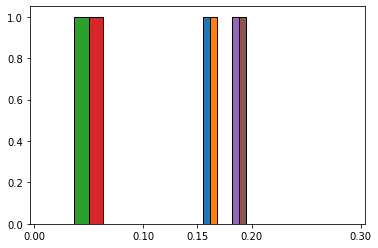

In [193]:
plt.hist(con_dur.loc[7], bins=bins, edgecolor="k",)

plt.xticks(bins)
plt.show()

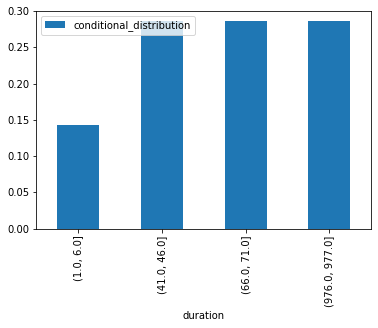

In [147]:
con_dur.loc[0].plot.bar()

In [180]:
data

,duration,amplitude
time_period,,
18:00:00,3.0,-11.250
18:00:00,9.0,10.000
18:00:00,2.0,-6.250
18:00:00,2.0,6.250
18:00:00,52.0,-6.250
...,...,...
18:00:00,1.0,-10.000
18:00:00,18.0,13.125
18:00:00,108.0,-3.125


In [178]:
import plotly.express as px
tips = px.data.tips()
fig = px.histogram(tips, x="total_bill", histnorm='probability density')
fig.show()

In [183]:
px.data.tips()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [185]:
px.data.tips().total_bill.max()

50.81